Made on 24/07/2024 by Alistair Duffey


Notebook makes the .csv file "forcing_variability_decomp" which summarises the forcing, burden and AODs for all runs, to use in plotting in 05. 

In [1]:
import os
import glob
import pandas as pd
import numpy as np
import logging
#import esmvalcore.preprocessor
import xarray as xr
from xmip.preprocessing import rename_cmip6
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import cftime
import matplotlib
matplotlib.rcParams.update({'font.size': 14})
import warnings
warnings.filterwarnings('ignore')

In [2]:
def get_ds(run, var):
    path = '/gws/nopw/j04/moghli/postprocessed_ncs/{r}/{v}/'.format(r=run, v=var)
    ds_list = []
    for file in os.listdir(path):
        ds_list.append(xr.open_dataset(path+file))
    ds = xr.concat(ds_list, dim='time').sortby('time')
    return ds


def get_ds_ts(run, var):
    path = '/gws/nopw/j04/moghli/postprocessed_ncs/{r}/{v}/'.format(r=run, v=var)
    ds_list = []
    for file in os.listdir(path):
        ds_list.append(xr.open_dataset(path+file))
    ds = xr.concat(ds_list, dim='time').sortby('time')
    ds = ds.sel(time='2036')
    ds = ds.mean('longitude')
    weights = np.cos(np.deg2rad(ds['latitude']))
    ds = ds.weighted(weights).mean('latitude')
    return ds


In [3]:
run_dict = {'u-dg683':[30.625, 12.3],
            'u-df777':[30.625, 12.9],
            'u-de348':[30.625, 14.1],
            'u-de517':[30.625, 15.4],
            'u-de349':[30.625, 16.0],
            'u-de350':[30.625, 18.0],
            'u-de365':[30.625, 20.2],
            'u-de110':[40.625, 12.3],
            'u-de636':[40.625, 12.9],
            'u-de111':[40.625, 14.1],
            'u-de505':[40.625, 15.4],
            'u-de145':[40.625, 16.0],
            'u-de187':[40.625, 18.0],
            'u-de369':[40.625, 20.2],
            'u-dd987':[50.625, 12.3],
            'u-de593':[50.625, 12.9],
            'u-dd989':[50.625, 14.1],
            'u-de506':[50.625, 15.4],
            'u-de012':[50.625, 16.0],
            'u-de013':[50.625, 18.0],
            'u-de399':[50.625, 20.2],
            'u-de018':[60.625, 12.3],
            'u-de567':[60.625, 12.9],
            'u-de026':[60.625, 14.1],
            'u-de633':[60.625, 15.4],
            'u-de050':[60.625, 16.0],
            'u-de052':[60.625, 18.0],
            'u-de457':[60.625, 20.2],
            'u-dg027':[70.625, 12.3],
            'u-df710':[70.625, 12.9],
            'u-dg309':[70.625, 14.1],
            'u-dg028':[70.625, 15.4],
            'u-dg549':[70.625, 16.0],
            'u-dg552':[70.625, 18.0],
            'u-dg655':[70.625, 20.2]
            }

run_dict = {'u-dg683':[30.625, 12.3],
            'u-df777':[30.625, 12.9],
            'u-de348':[30.625, 14.1],
            'u-de517':[30.625, 15.4],
            'u-de349':[30.625, 16.0],
            'u-de350':[30.625, 18.0],
            'u-de365':[30.625, 20.2],
            'u-de110':[40.625, 12.3],
            'u-de636':[40.625, 12.9],
            'u-de111':[40.625, 14.1],
            'u-de505':[40.625, 15.4],
            'u-de145':[40.625, 16.0],
            'u-de187':[40.625, 18.0],
            'u-de369':[40.625, 20.2],
            'u-dd987':[50.625, 12.3],
            'u-de593':[50.625, 12.9],
            'u-dd989':[50.625, 14.1],
            'u-de506':[50.625, 15.4],
            'u-de012':[50.625, 16.0],
            'u-de013':[50.625, 18.0],
            'u-de399':[50.625, 20.2],
            'u-de018':[60.625, 12.3],
            'u-de567':[60.625, 12.9],
            'u-de026':[60.625, 14.1],
            'u-de633':[60.625, 15.4],
            'u-de050':[60.625, 16.0],
            'u-de052':[60.625, 18.0],
            'u-de457':[60.625, 20.2],
            'u-dg027':[70.625, 12.3],
            'u-df710':[70.625, 12.9],
            'u-dg309':[70.625, 14.1],
            'u-dg028':[70.625, 15.4],
            'u-dg549':[70.625, 16.0],
            'u-dg552':[70.625, 18.0],
            'u-dg655':[70.625, 20.2],
            'u-df848':[60.625, 12.9, 'Spring'],
            'u-df859':[60.625, 12.9, 'Summer'],
            'u-df931':[60.625, 12.9, 'Autumn'],
            'u-df932':[60.625, 12.9, 'Winter'],
            'u-dg051':[60.625, 12.9, 'Jan-Jun/Jul-Dec'],
            'u-dg331':[60.625, 12.9, 'Mar-Aug/Sep-Feb'],
            'u-dg381':[30.625, 15.4, 'Mar-Aug/Sep-Feb']
            }

In [4]:
background = get_ds('u-be537', 'burdens_2d')

ssp245_r1_H2SO4 = background.mean(dim=['longitude'])
weights = np.cos(np.deg2rad(ssp245_r1_H2SO4['latitude']))
ssp245_r1_H2SO4_ts = ssp245_r1_H2SO4.weighted(weights).mean(dim='latitude')

In [5]:
ds_list = []
run_list = []
for run in run_dict.keys():
    #print(run)
    run_list.append(run)
    ds = get_ds(run, 'burdens_2d')
    ds['injection_latitude'] = run_dict[run][0]
    ds['injection_altitude'] = run_dict[run][1]
    ds_list.append(ds.mean(dim=['longitude', 'time']))
ds_dict = dict(zip(run_list, ds_list))

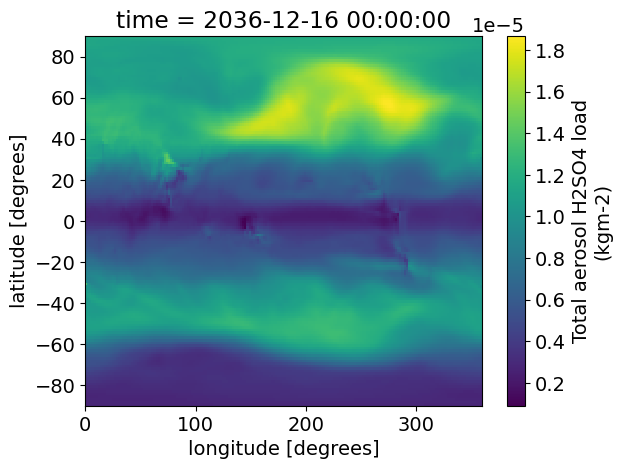

In [6]:
test = get_ds('u-de365', 'burdens_2d')['Total aerosol H2SO4 load (kgm-2)'].isel(time=-1)
(test-background.isel(time=-1))['Total aerosol H2SO4 load (kgm-2)'].plot()

In [7]:
# get ssp245 baseline aod:
path = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/AERmon/od550aer/gn/latest/'
aod_ssp245_r1 = rename_cmip6(xr.open_mfdataset(path+'*.nc')).sel(time='2036')
aod_ssp245_r1 = aod_ssp245_r1.mean(dim=['x']).rename({'y':'latitude'})
weights = np.cos(np.deg2rad(aod_ssp245_r1['latitude']))
aod_ssp245_r1_ts = aod_ssp245_r1.weighted(weights).mean(dim='latitude')

# get ssp245 baseline forcing:
def get_ssp245_ds_r1(variable, table='Amon', grid='gn'):
    path = '/badc/cmip6/data/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp245/r1i1p1f2/{t}/{v}/{g}/latest/'.format(t=table,v=variable, g=grid)
    ds = rename_cmip6(xr.open_mfdataset(path+'*.nc')).sel(time='2036')
    ds = ds.rename({'x':'longitude',
                    'y':'latitude'})
    weights = np.cos(np.deg2rad(ds['latitude']))
    ds_ts = ds.mean(dim='longitude').weighted(weights).mean(dim='latitude')
    return ds, ds_ts
rsut_ssp245, rsut_ssp245_ts = get_ssp245_ds_r1(variable='rsut', table='Amon', grid='gn')
rlut_ssp245, rlut_ssp245_ts = get_ssp245_ds_r1(variable='rlut', table='Amon', grid='gn')
rsutaf_ssp245, rsutaf_ssp245_ts = get_ssp245_ds_r1(variable='rsutaf', table='AERmon', grid='gn')
rlutaf_ssp245, rlutaf_ssp245_ts = get_ssp245_ds_r1(variable='rlutaf', table='AERmon', grid='gn')
rsdscs_ssp245, rsdscs_ssp245_ts = get_ssp245_ds_r1(variable='rsdscs', table='Amon', grid='gn')
# also merge into one spatial ds:
ds_ssp245 = xr.merge([rsut_ssp245, rlut_ssp245, rsutaf_ssp245, rlutaf_ssp245, rsdscs_ssp245])
ds_ssp245['aerDirectForcing_SW'] = ds_ssp245['rsutaf'] - ds_ssp245['rsut']
ds_ssp245['aerDirectForcing_LW'] = ds_ssp245['rlutaf'] - ds_ssp245['rlut']
ds_ssp245['aerDirectForcing'] = ds_ssp245['aerDirectForcing_SW'] + ds_ssp245['aerDirectForcing_LW']
weights = np.cos(np.deg2rad(ds_ssp245['latitude']))
ds_ssp245_ts = ds_ssp245.mean(dim='longitude').weighted(weights).mean(dim='latitude')


In [8]:
# do forcing calcs for all runs:
ds_list = []
ds_ts_list = []
#da_list = []
run_list = []
for run in run_dict.keys():
    print(run)
    run_list.append(run)
    ds1 = get_ds(run, 'RadFluxes')
    ds1 = ds1.rename({'outgoing SW flux TOA':'rsut',
                      'outgoing_LW_rad_flux_TOA':'rlut'})
    ds1['injection_latitude'] = run_dict[run][0]
    ds1['injection_altitude'] = run_dict[run][1]
    ds1 = ds1.sel(time='2036')

    ds2 = get_ds(run, 'TOAFluxesUpCleanSky')
    ds2 = ds2.rename({'clean-air_upward_SW_flux_levels':'rsutaf',
                      'clean-air_upward_LW_flux_levels':'rlutaf'})
    ds2['injection_latitude'] = run_dict[run][0]
    ds2['injection_altitude'] = run_dict[run][1]
    ds2 = ds2.sel(time='2036')

    ds = xr.merge([ds1, ds2])
    ds['aerDirectForcing_SW'] = ds['rsutaf'] - ds['rsut']
    ds['aerDirectForcing_LW'] = ds['rlutaf'] - ds['rlut']
    ds['aerDirectForcing'] = ds['aerDirectForcing_SW'] + ds['aerDirectForcing_LW']
    ds_list.append(ds.mean(dim=['longitude']))
    
    weights = np.cos(np.deg2rad(ds['latitude']))
    ds_ts = ds.weighted(weights).mean(dim='latitude')
    ds_ts_list.append(ds_ts)
    
ds_dict_fluxes = dict(zip(run_list, ds_list))
ds_dict_fluxes_ts = dict(zip(run_list, ds_ts_list))

u-dg683
u-df777
u-de348
u-de517
u-de349
u-de350
u-de365
u-de110
u-de636
u-de111
u-de505
u-de145
u-de187
u-de369
u-dd987
u-de593
u-dd989
u-de506
u-de012
u-de013
u-de399
u-de018
u-de567
u-de026
u-de633
u-de050
u-de052
u-de457
u-dg027
u-df710
u-dg309
u-dg028
u-dg549
u-dg552
u-dg655
u-df848
u-df859
u-df931
u-df932
u-dg051
u-dg331
u-dg381


In [9]:
runs, burdens, aods, SW_Fs, Fs, aod_per_burdens, SW_F_per_aods, F_per_SW_Fs = [], [], [], [], [], [], [], []

for run in run_dict.keys():
    burden = (get_ds_ts(run, 'burdens_2d')-ssp245_r1_H2SO4_ts)['Total aerosol H2SO4 load (kgm-2)'].mean().item()
    aod = (get_ds_ts(run, 'AOD')['Total_AOD'] - aod_ssp245_r1_ts['od550aer']).mean().values.item()
    SW_F = (ds_dict_fluxes_ts[run]['aerDirectForcing_SW'] - ds_ssp245_ts['aerDirectForcing_SW']).mean().values.item()
    F = (ds_dict_fluxes_ts[run]['aerDirectForcing'] - ds_ssp245_ts['aerDirectForcing']).mean().values.item()

    runs.append(run)
    burdens.append(burden)
    aods.append(aod)
    SW_Fs.append(SW_F)
    Fs.append(F)
    aod_per_burdens.append(aod/burden)
    SW_F_per_aods.append(SW_F/aod)
    F_per_SW_Fs.append(F/SW_F)

df = pd.DataFrame({'Run':runs,
                   'Burden':burdens,
                   'aod':aods,
                   'SW_F':SW_Fs,
                   'F':Fs,
                   'aod_per_burden':aod_per_burdens,
                   'SW_F_per_aod':SW_F_per_aods,
                   'F_per_SW_F':F_per_SW_Fs})

ref_run = 'u-de365'
df['burden_rel'] = df['Burden']/(df[df['Run']==ref_run]['Burden'].item())
df['aod_per_burden_rel'] = df['aod_per_burden']/(df[df['Run']==ref_run]['aod_per_burden'].item())
df['SW_F_per_aod_rel'] = df['SW_F_per_aod']/(df[df['Run']==ref_run]['SW_F_per_aod'].item())
df['F_per_SW_F_rel'] = df['F_per_SW_F']/(df[df['Run']==ref_run]['F_per_SW_F'].item())

df.to_csv('Intermediate_outputs/Forcing_variability_decomp.csv')